___________________________________________
# PitE winter 2022
## Lab4 - Machine Learning Part 1

### 1.1 Iris dataset

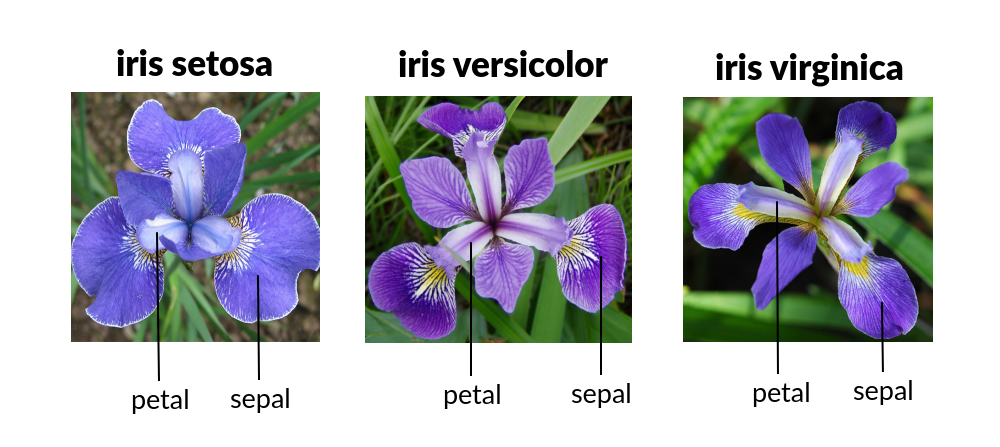

The classic data set containing measurements of 3 different types of irises (Setosa, Versicolour and Virginica).


In [6]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.datasets import load_iris
from pandas.plotting import scatter_matrix

iris_dataset = load_iris() # loading data from sklearn datasets

In [7]:
print("Features: \n{}".format(iris_dataset.keys()))

Features: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [8]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
print("Class: {}".format(iris_dataset['target_names']))
print("Features: \n{}".format(iris_dataset['feature_names']))
print("Shape of data: {}".format(iris_dataset['data'].shape))
print("Data:\n{}".format(iris_dataset['data'][:10]))
print("Target:\n{}".format(iris_dataset['target']))

Class: ['setosa' 'versicolor' 'virginica']
Features: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape of data: (150, 4)
Data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Let's investigate correlation between variables:

In [10]:
help(scatter_matrix)

Help on function scatter_matrix in module pandas.plotting._misc:

scatter_matrix(frame: 'DataFrame', alpha: 'float' = 0.5, figsize: 'tuple[float, float] | None' = None, ax: 'Axes | None' = None, grid: 'bool' = False, diagonal: 'str' = 'hist', marker: 'str' = '.', density_kwds=None, hist_kwds=None, range_padding: 'float' = 0.05, **kwargs) -> 'np.ndarray'
    Draw a matrix of scatter plots.
    
    Parameters
    ----------
    frame : DataFrame
    alpha : float, optional
        Amount of transparency applied.
    figsize : (float,float), optional
        A tuple (width, height) in inches.
    ax : Matplotlib axis object, optional
    grid : bool, optional
        Setting this to True will show the grid.
    diagonal : {'hist', 'kde'}
        Pick between 'kde' and 'hist' for either Kernel Density Estimation or
        Histogram plot in the diagonal.
    marker : str, optional
        Matplotlib marker type, default '.'.
    density_kwds : keywords
        Keyword arguments to be pass

In [36]:
print(iris_dataset['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [31]:
data_iris = pd.DataFrame(data= np.c_[iris_dataset['data'], iris_dataset['target']],
                     columns= iris_dataset['feature_names'] + ['target'])
# look carefully at np.c_ function, our data set has different structure, incompatible with scatter plot maker, we need convert data to pandas data frame

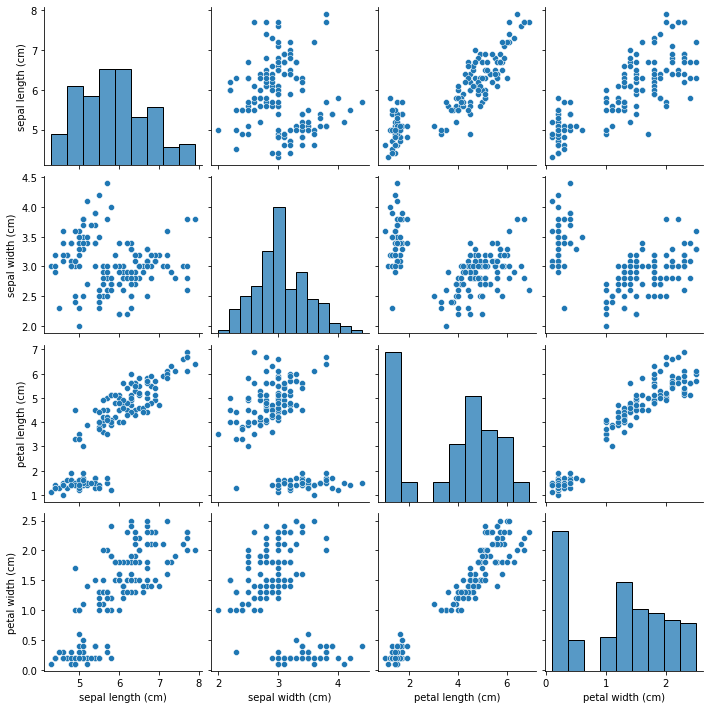

In [35]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(data_iris, columns = iris_dataset.feature_names)
sns.pairplot(data=iris_dataframe)

Compare the obtained results with the following distributions with the given correlation coefficients. 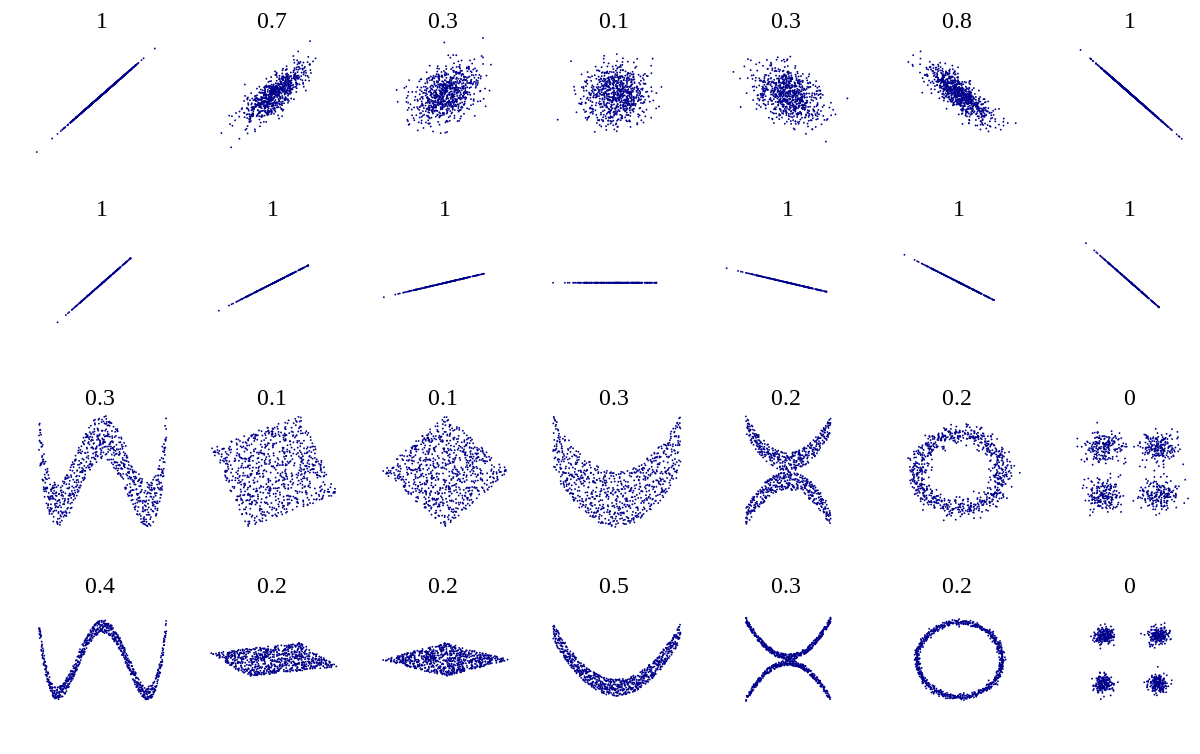

Seaborn useful as always...

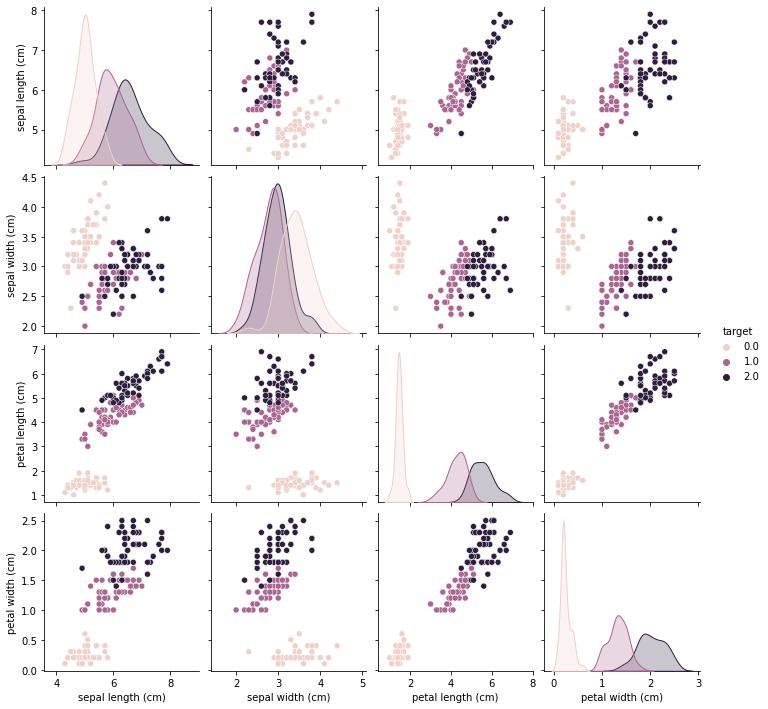

In [33]:
# why not make it even more interesting and add simple selection?
sns.pairplot(data=data_iris, hue= 'target')

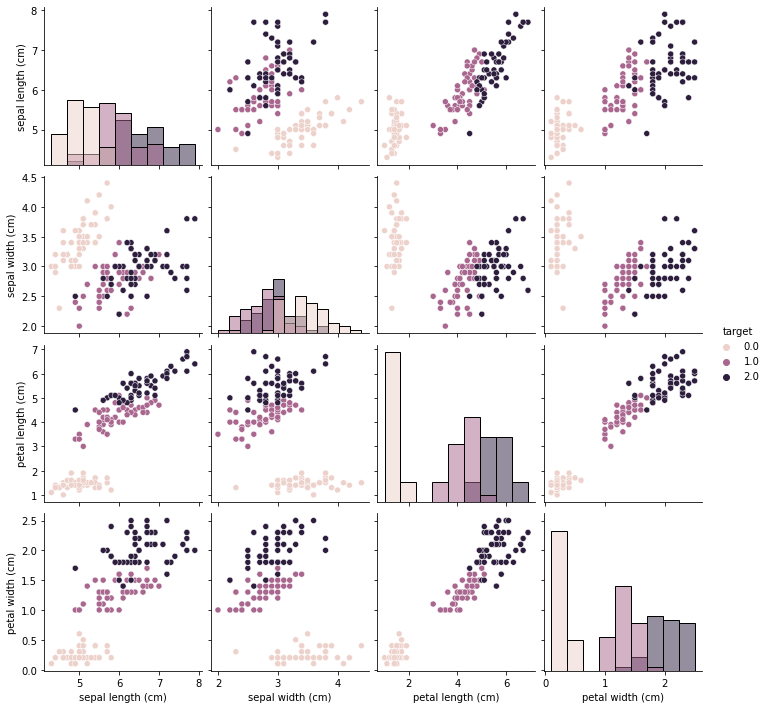

In [14]:
# and with a histogram as a marginal plot
sns.pairplot(data=data_iris, hue= 'target', diag_kind="hist")

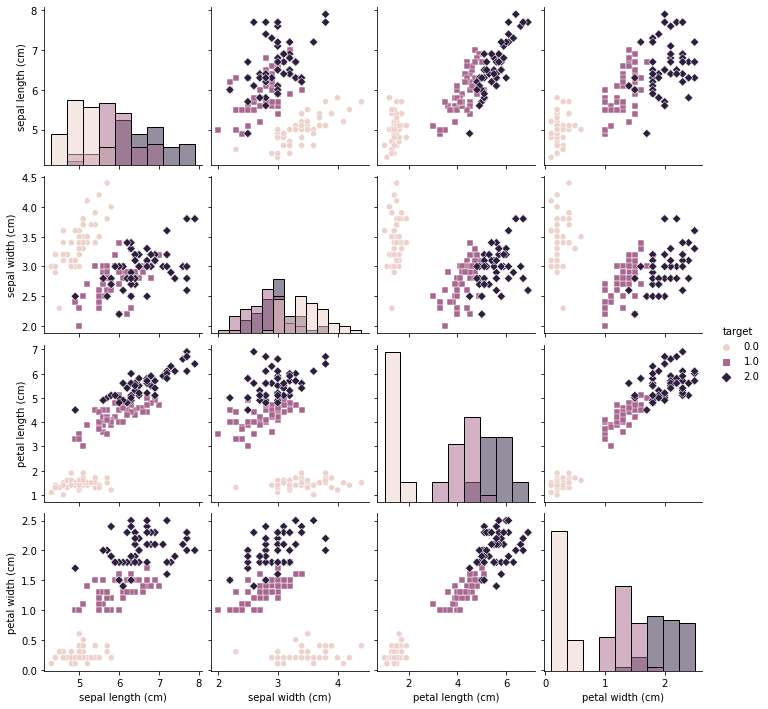

In [15]:
# with different markers - to make it a bit more easy to interpret
sns.pairplot(data=data_iris, hue= 'target', diag_kind="hist", markers=["o", "s", "D"])

## Excercise
1. Check how to create KDE histograms.

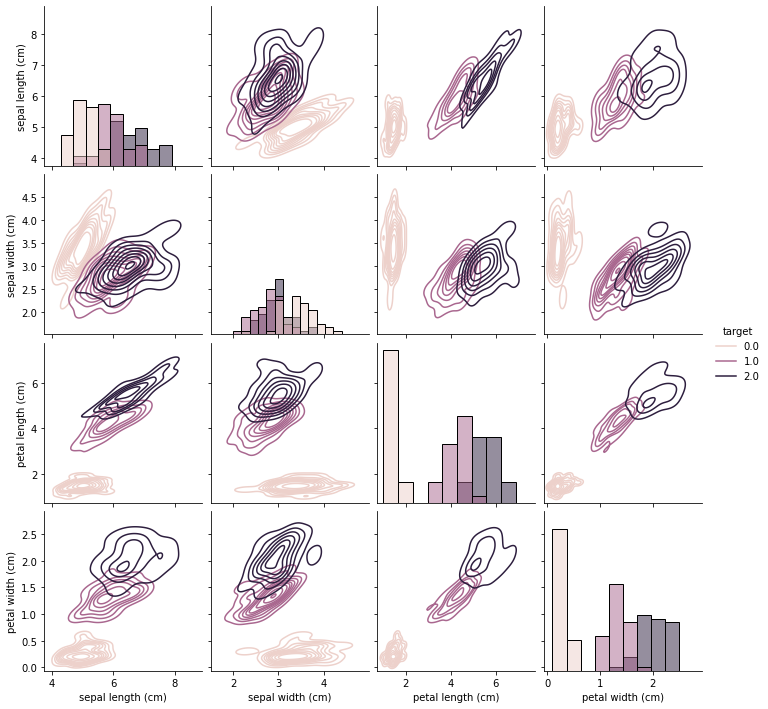

In [16]:
# can also plot total kde...
sns.pairplot(data=data_iris, hue= 'target', diag_kind="hist", kind="kde")

## 1.2  Linear regression

## TODO - part 1:

1. Write a function which calculates loss using MRS method.

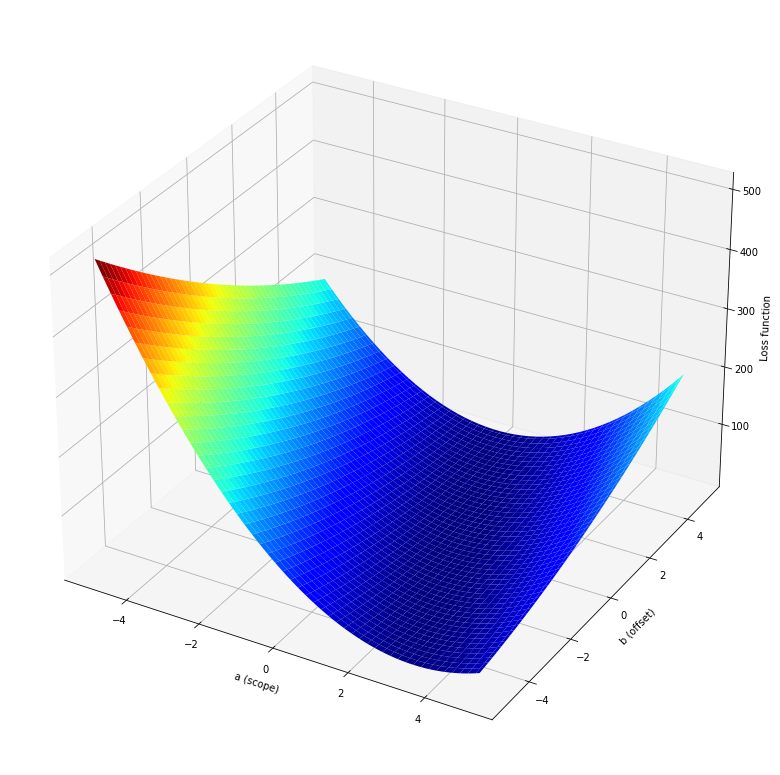

In [17]:
plt.rcParams["figure.figsize"] = (14,14)

def get_cost(A,B): # 
  x = np.array([1.,2,3,4])
  y = np.array([1.2,2.8,5.3,6.4])
  loss = 0
  
  for i,j in zip(x,y):
    loss += (j - (A*i + B)) ** 2
  
  return loss / len(y)
  
  

a = np.linspace(-5,5,100)
b = np.linspace(-5,5,100)

A, B = np.meshgrid(a,b)
cost_grid = get_cost(A,B)
# print(cost_grid)

ax = plt.axes(projection = '3d')
ax.set_xlabel('a (scope)')
ax.set_ylabel('b (offset)')
ax.set_zlabel('Loss function')
ax.plot_surface(A, B, cost_grid, cmap = 'jet')

## TODO - part 2:

1. Design an algorithm that will perform a linear regression (from scratch, without the use of algorithms implemented in sklearn or other!) using the data and initial parameters below:

*   x = np.array([1, 2, 3, 4])
*   y = np.array([1.2, 2.8, 5.3, 6.4])
*   a, b = 0.0, 1.0
*   eta = 0.001
*   epochs = 1000

18.787850000000002
18.0227540289
17.286179154285257
16.577127559277116
15.894635364354285
15.237771488449692
14.605636548018078
13.997361792812256
13.41210807714828
12.849064865479967
12.30744927114246
11.786505127162311
11.285502088068226
10.80373476167184
10.34052186982225
9.895205437170954
9.4671500070159
9.055741883324266
8.660388398063361
8.280517202998068
7.915575585141088
7.565029805069308
7.228364457345679
6.905081852311288
6.594701418536657
6.296759125244964
6.010806924042666
5.736412209315041
5.473157296665555
5.220638918798518
4.978467738264493
4.746267876507133
4.523676458668807
4.310343173630395
4.105929848778006
3.9101100390062746
3.722568629484144
3.543001451724795
3.3711149125166093
3.2066256352867537
3.0492601134832475
2.8987543755750647
2.754853661283196
2.6173121086683953
2.4858924517138106
2.3603657280527006
2.2405109965030654
2.1261150640822586
2.016972222185498
1.9128839916227331
1.8136588762184287
1.7191121246886871
1.6290655005196037
1.5433470595799348
1.4617909

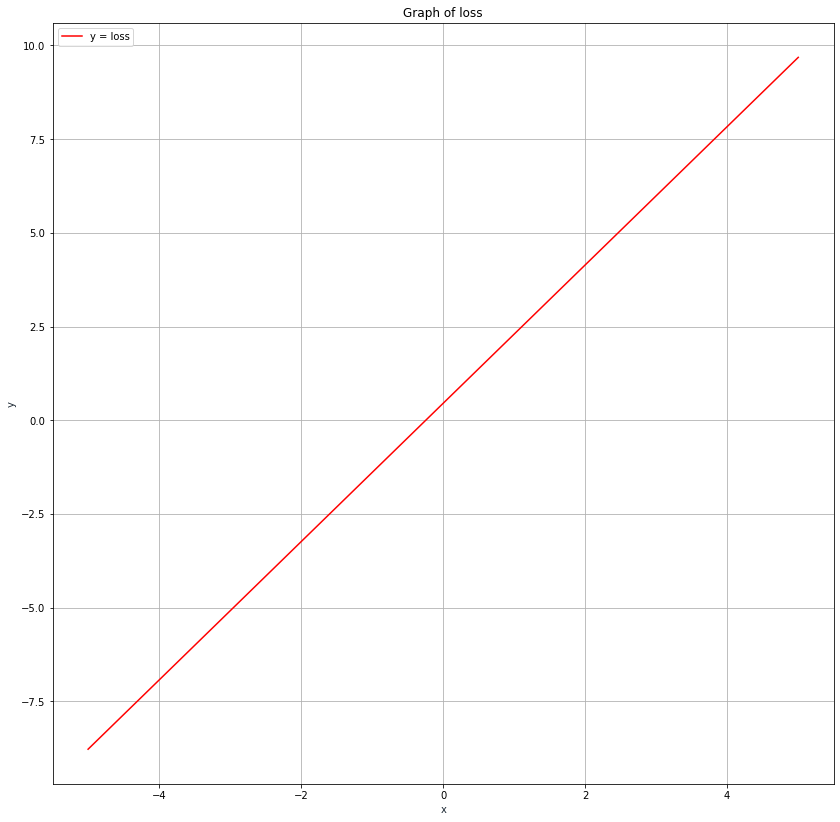

In [25]:
x = np.array([1, 2, 3, 4])
y = np.array([2, 4, 6, 8])
a, b = 0.0, 0.0
eta = 0.001
epochs = 1000

# CODE HERE
def linear_reg(x, y, a, b, eta, epochs):
  
  for i in range(epochs):
    a_dif = 0.0
    b_dif = 0.0

    for i,j in zip(x,y):
      a_dif += -2*i*(j - (a*i+b))
      b_dif += -2*(j - (a*i+b))



    a_dif = a_dif / len(x)
    b_dif = b_dif / len(x)

    a = a - a_dif * eta
    b = b - b_dif * eta

    print(get_cost(a,b))

  return a,b 

a,b = linear_reg(x, y, a, b, eta, epochs)
print(a,b)
x = np.linspace(-5,5,100)
y = a*x+b
plt.plot(x, y, '-r', label='y = loss')
plt.title('Graph of loss')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## TODO - part 3.

1. Investigate the correlation  of eta (learning rate) and training speed and efficiency. Explain observed effects.
2. Investigate the influency of the initial parameters a,b on the stability of the algorithm.
3. Change the values of parameter *y* to non-linear and study the stability of the algorithm.
4. Create the histogram of error vs epoch.

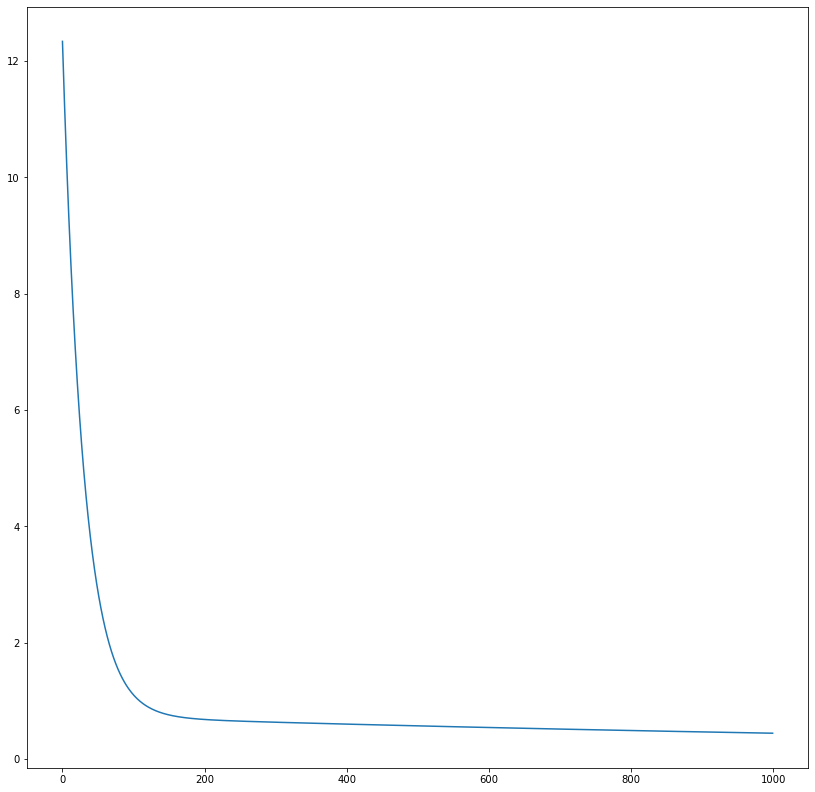

In [37]:
x = np.array([1, 2, 3, 4])
y = np.array([1.2, 2.8, 5.3, 6.4])
a, b = 0, 1
eta = 0.001
epochs = 1000
def linear_reg(x, y, a, b, eta, epochs):
  
  mse = 0
  all_mse = []

  for i in range(epochs):
    a_dif = 0.0
    b_dif = 0.0

    for i,j in zip(x,y):
      a_dif += -2*i*(j - (a*i+b))
      b_dif += -2*(j - (a*i+b))

    a_dif = a_dif / len(x)
    b_dif = b_dif / len(x)

    a = a - a_dif * eta
    b = b - b_dif * eta

    mse = get_cost(a,b)

    all_mse.append(mse)

  return a,b, all_mse, mse

a, b, all_mse, mse = linear_reg(x, y, a, b, eta, epochs)

plt.plot(range(epochs),all_mse)
